# Analysis of the Chemical Universe growth vs diversity using iSIM based tools
By Kenneth Lopez-Perez

Miranda-Quintana Group

University of Florida

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from universe_class import Universe
from seaborn import heatmap
import ast

Load the data as a .csv file. File should contain a column named 'smiles' and 'release'. The release corresponds to the realease number or correspondent year, must be an int. 

We create an universe object to do our analysis. For this example we will use ChEMBL's natural products file in the data directory.

In [2]:
# Set the similarity index of choice between "JT" Jaccard-Tanimoto, "SM" Sokal-Michener, and "RR" Russell-Rao
similarity_index = "JT"

# Set the fingerprint type of choice between "RDKIT", "ECFP4", "ECFP6", and "MACCS"
fingerprint_type = "RDKIT"

# Set the number of desired bits, necessary in case of ECFP fingerprints
n_bits = 1024

chembl_np = Universe('data/chembl_33_np.csv', n_ary=similarity_index, fingerprint_type=fingerprint_type, n_bits=n_bits)

Generate the fingerprints, they can be safed if wanted

In [3]:
# Generate the fingerprints
#chembl_np.calc_universe_fingerprints()

# Saved the fingerprints if wanted as .npy file
# chembl_np.save_universe_fingerprints()

# Load the fingerprints if already saved as .npy file
chembl_np.set_universe_fingerprints('data/chembl_33_np.npy')

Perform the similarity/diversity analysis of the Chemical Universe

This will generate a csv with the analysis

In [4]:
universe_analysis = chembl_np.universe_analysis()

Analysis of release 1 completed
Analysis of release 2 completed
Analysis of release 3 completed
Analysis of release 4 completed
Analysis of release 5 completed
Analysis of release 6 completed
Analysis of release 7 completed
Analysis of release 8 completed
Analysis of release 9 completed
Analysis of release 10 completed
Analysis of release 11 completed
Analysis of release 12 completed
Analysis of release 13 completed
Analysis of release 14 completed
Analysis of release 15 completed
Analysis of release 16 completed
Analysis of release 17 completed
Analysis of release 18 completed
Analysis of release 19 completed
Analysis of release 20 completed
Analysis of release 21 completed
Analysis of release 22 completed
Analysis of release 23 completed
Analysis of release 24 completed
Analysis of release 25 completed
Analysis of release 26 completed
Analysis of release 27 completed
Analysis of release 28 completed
Analysis of release 29 completed
Analysis of release 30 completed
Analysis of release

Plotting of the calculated ChemUniverse growth vs diversity

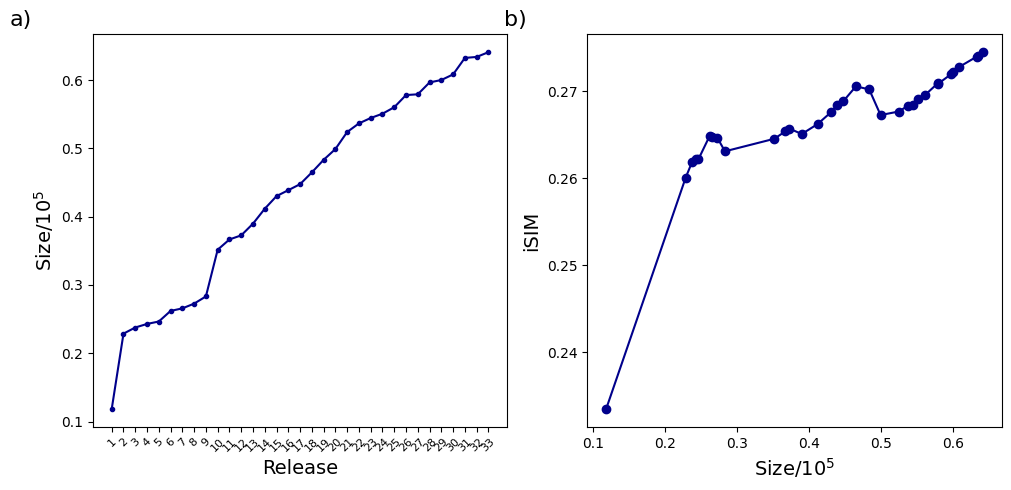

In [5]:
# Create a plot with two panels, one year vs size and the other size vs iSIM
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the year vs size
ax[0].plot(universe_analysis['release'], np.array(universe_analysis['size'])/10**5, color='darkblue', marker='.')

# Plot the size vs iSIM
ax[1].plot(np.array(universe_analysis['size'])/10**5, universe_analysis['iSIM'], color='darkblue', marker='o')

# Add labels and title
ax[0].set_xlabel('Release', fontsize=14)
ax[0].set_ylabel('Size/$10^5$', fontsize=14)

# Set all tick marks for all the releases
ax[0].set_xticks(universe_analysis['release'])

# Set title for the two panels
ax[0].set_title('a)', fontsize=16, loc='left', x=-0.2)
ax[1].set_title('b)', fontsize=16, loc='left', x=-0.2)

# Rotate the x-tick labels for better readability
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, fontsize=8)
plt.setp(ax[0].yaxis.get_majorticklabels(), fontsize=10)

ax[1].set_xlabel('Size/$10^5$', fontsize=14)
ax[1].set_ylabel('iSIM', fontsize=14)

# Set font size for the y the x-tick labels
plt.setp(ax[1].xaxis.get_majorticklabels(), fontsize=10)
plt.setp(ax[1].yaxis.get_majorticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

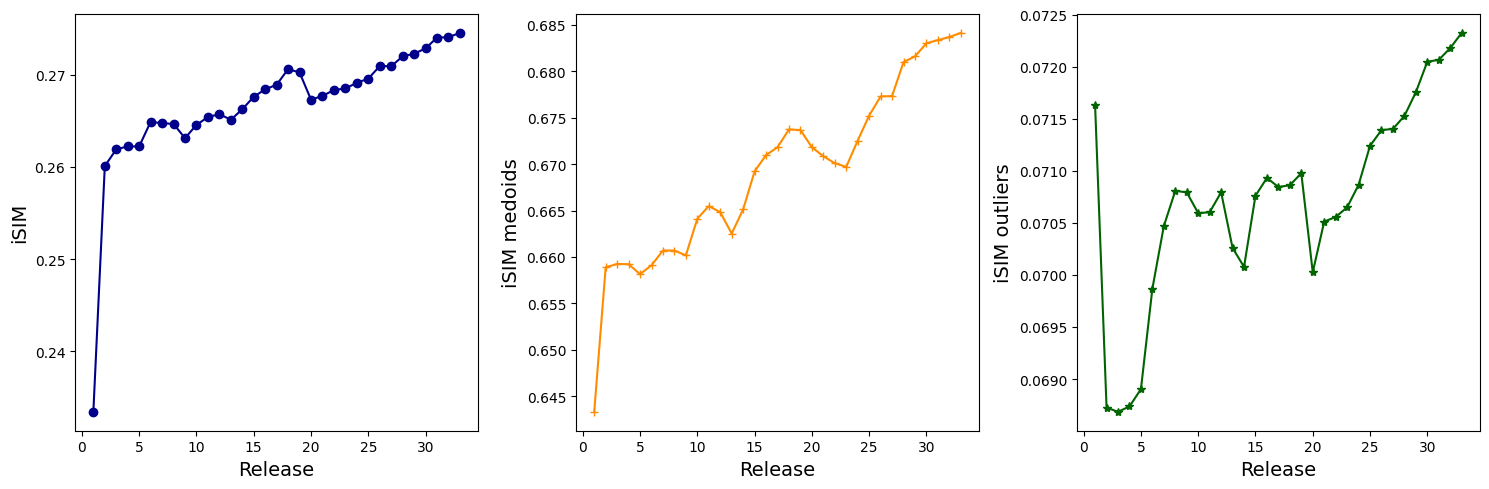

In [17]:
# Plot iSIM of the whole data, medoids, and outliers in three panels
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the iSIM of the whole data
ax[0].plot(universe_analysis['release'], universe_analysis['iSIM'], color='darkblue', marker='o')

# Plot the iSIM of the medoids
ax[1].plot(universe_analysis['release'], universe_analysis['iSIM_medoids'], color='darkorange', marker='+')

# Plot the iSIM of the outliers
ax[2].plot(universe_analysis['release'], universe_analysis['iSIM_outliers'], color='darkgreen', marker='*')

# Add labels and title
ax[0].set_xlabel('Release', fontsize=14)
ax[0].set_ylabel('iSIM', fontsize=14)

ax[1].set_xlabel('Release', fontsize=14)
ax[1].set_ylabel('iSIM medoids', fontsize=14)

ax[2].set_xlabel('Release', fontsize=14)
ax[2].set_ylabel('iSIM outliers', fontsize=14)


plt.tight_layout()
plt.show()

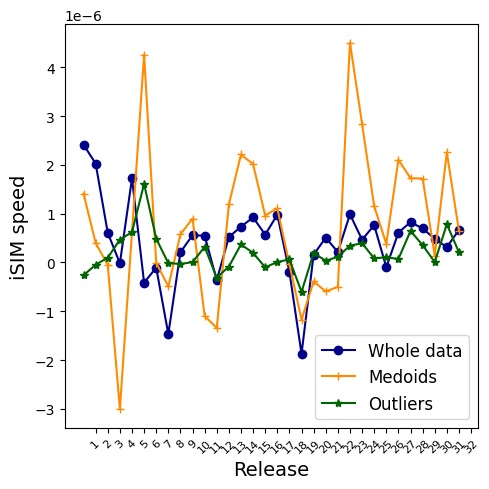

In [18]:
# Plot the iSIM speed respect to the size of the data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

iSIM_speed = np.diff(universe_analysis['iSIM'])/np.diff(universe_analysis['size'])
iSIM_speed_medoids = np.diff(universe_analysis['iSIM_medoids'])/np.diff(universe_analysis['size'])
iSIM_speed_outliers = np.diff(universe_analysis['iSIM_outliers'])/np.diff(universe_analysis['size'])

plt.plot(iSIM_speed, color='darkblue', marker='o', label='Whole data')
plt.plot(iSIM_speed_medoids, color='darkorange', marker='+', label='Medoids')
plt.plot(iSIM_speed_outliers, color='darkgreen', marker='*', label='Outliers')

plt.xlabel('Release', fontsize=14)
plt.ylabel('iSIM speed', fontsize=14)

plt.xticks(universe_analysis['release'][:-1], rotation=45, fontsize=8)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

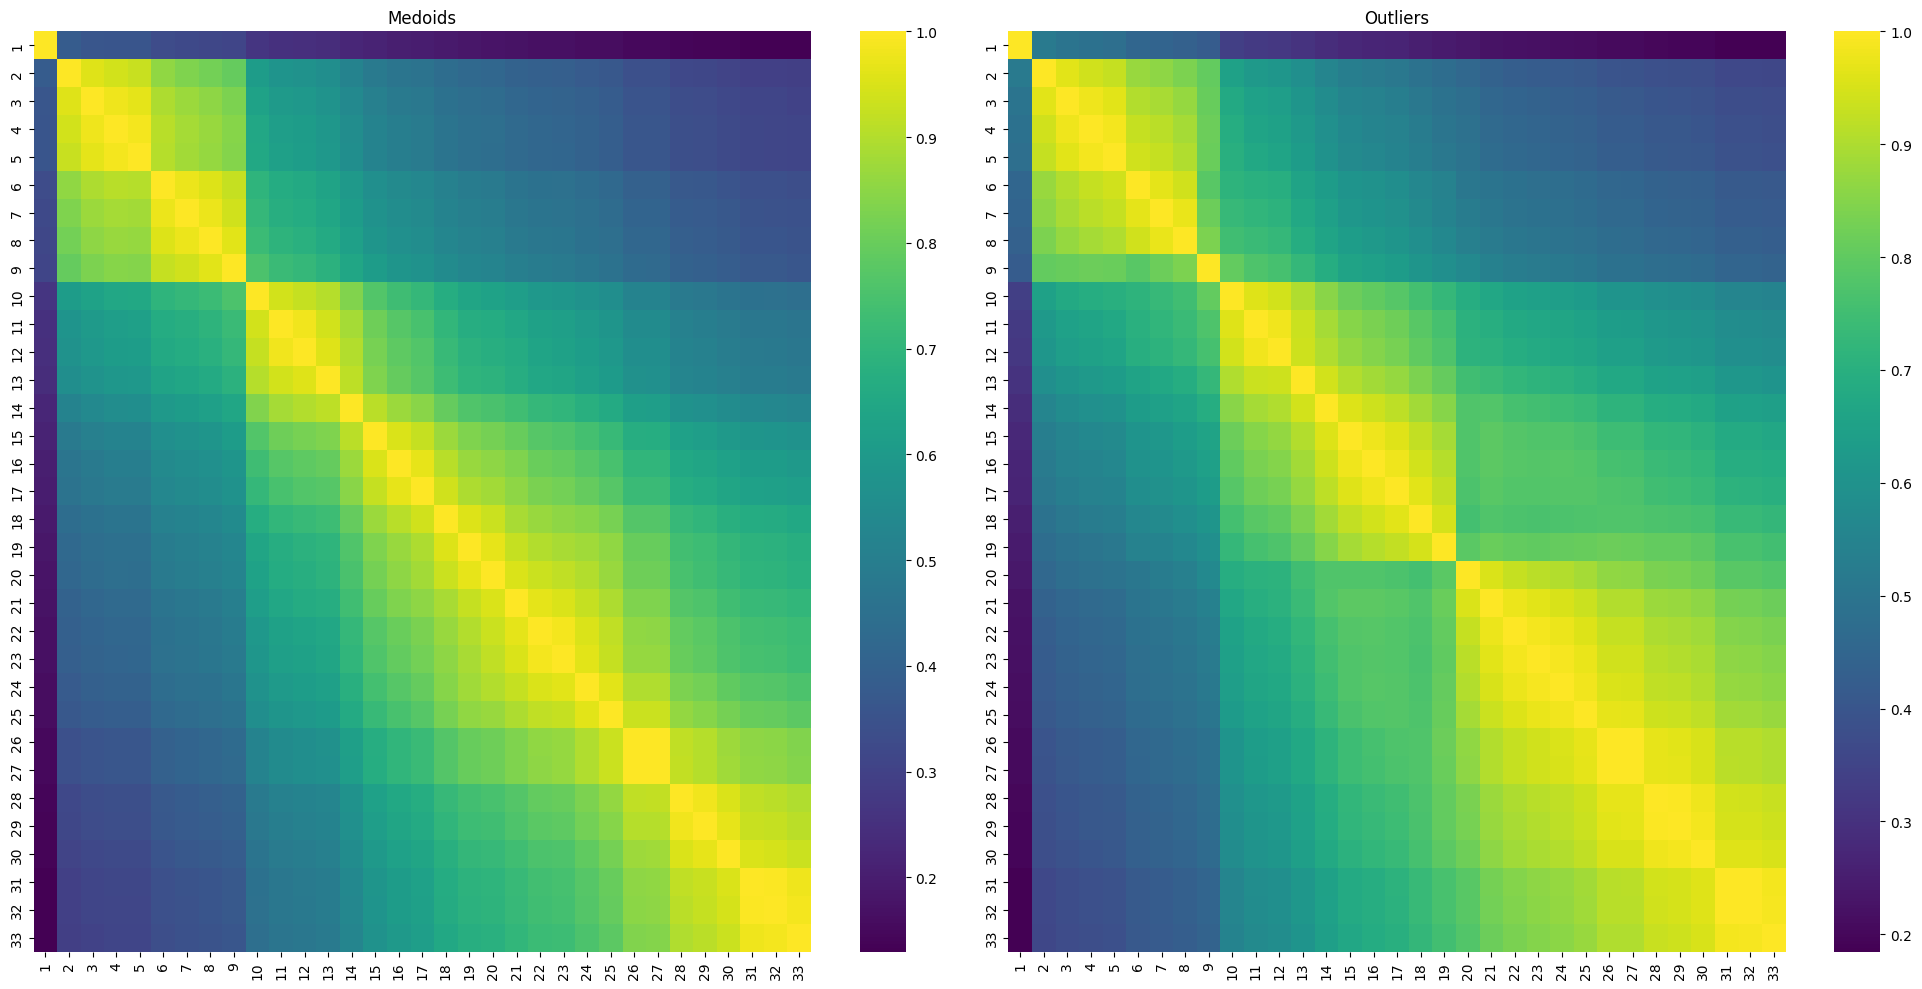

In [19]:
# Plot the heat maps of Jaccard similarity between the medoids and outliers of each release
universe_analysis['medoids'] = universe_analysis['medoids'].astype(str)
universe_analysis['outliers'] = universe_analysis['outliers'].astype(str)
universe_analysis['medoids'] = universe_analysis['medoids'].apply(ast.literal_eval)
universe_analysis['outliers'] = universe_analysis['outliers'].apply(ast.literal_eval)

medoids = universe_analysis['medoids'].tolist()
outliers = universe_analysis['outliers'].tolist()

# Create the Jaccard matrices
medoids_jaccard = []
outliers_jaccard = []
for medoid_1, outlier_1 in zip(medoids, outliers):
    medoids_new_line = []
    outliers_new_line = []
    for medoid_2, outlier_2 in zip(medoids, outliers):
        medoids_new_line.append(len(set(medoid_1).intersection(set(medoid_2)))/len(set(medoid_1).union(set(medoid_2))))
        outliers_new_line.append(len(set(outlier_1).intersection(set(outlier_2)))/len(set(outlier_1).union(set(outlier_2))))

    medoids_jaccard.append(medoids_new_line)
    outliers_jaccard.append(outliers_new_line)

medoids_jaccard = np.array(medoids_jaccard)
outliers_jaccard = np.array(outliers_jaccard)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

heatmap(medoids_jaccard, ax=ax[0], cmap='viridis', xticklabels=universe_analysis['release'], yticklabels=universe_analysis['release'])
ax[0].set_title('Medoids')

heatmap(outliers_jaccard, ax=ax[1], cmap='viridis', xticklabels=universe_analysis['release'], yticklabels=universe_analysis['release'])
ax[1].set_title('Outliers')

plt.tight_layout()    

Perform the clustering of the Chemical Universe

In [4]:
clusters = chembl_np.universe_clustering(save_csv=True ,return_clusters=False)
# If the clusters with mol_ids are wanted to be returned, set return_clusters=True
# If you do not want to save the csv with the cluster analytics, set save_csv=False

Clustering of release 1 completed
Clustering of release 2 completed
Clustering of release 3 completed
Clustering of release 4 completed
Clustering of release 5 completed
Clustering of release 6 completed
Clustering of release 7 completed
Clustering of release 8 completed
Clustering of release 9 completed
Clustering of release 10 completed
Clustering of release 11 completed
Clustering of release 12 completed
Clustering of release 13 completed
Clustering of release 14 completed
Clustering of release 15 completed
Clustering of release 16 completed
Clustering of release 17 completed
Clustering of release 18 completed
Clustering of release 19 completed
Clustering of release 20 completed
Clustering of release 21 completed
Clustering of release 22 completed
Clustering of release 23 completed
Clustering of release 24 completed
Clustering of release 25 completed
Clustering of release 26 completed
Clustering of release 27 completed
Clustering of release 28 completed
Clustering of release 29 comp

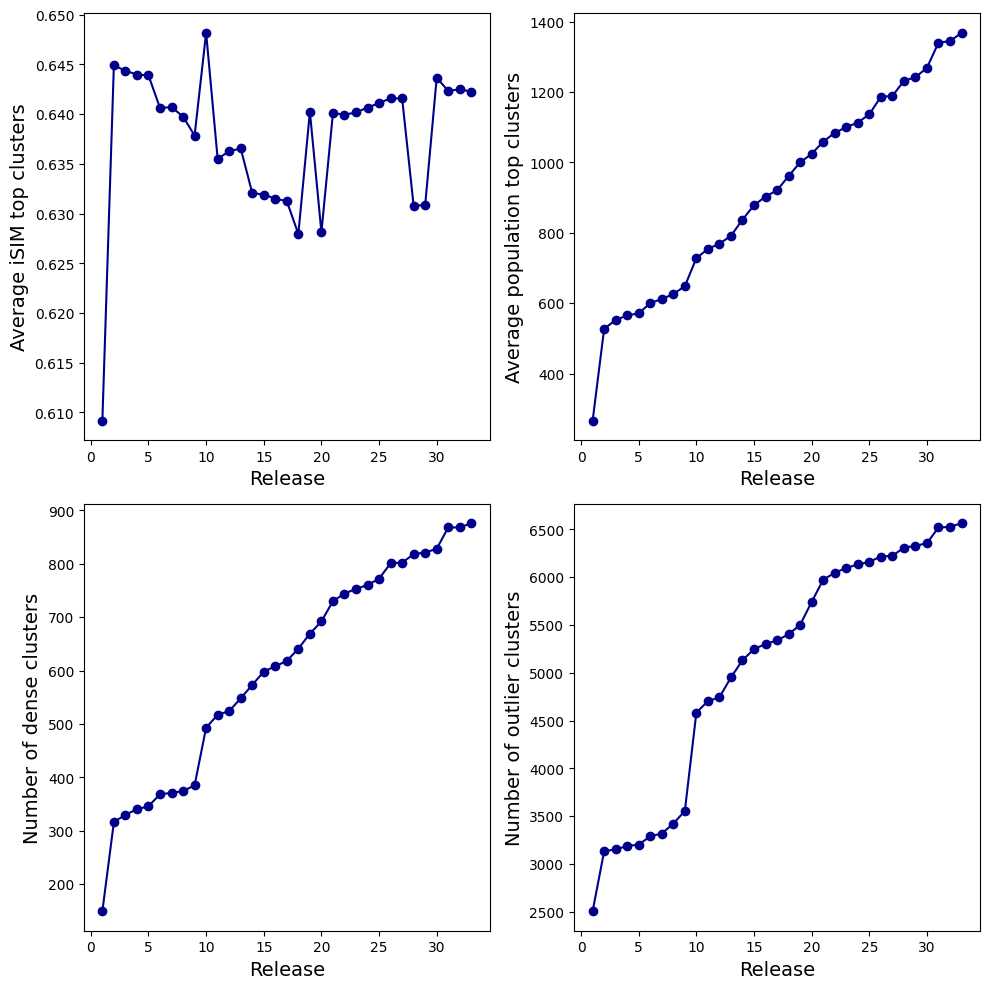

In [12]:
# Plot the clustering results in one four-panel plot
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot the average iSIM of the top 10 clusters
ax[0][0].plot(clusters['release'], clusters['avg_isim'], color='darkblue', marker='o')
ax[0][0].set_xlabel('Release', fontsize=14)
ax[0][0].set_ylabel('Average iSIM top clusters', fontsize=14)

# Plot the average population of the top 10 clusters
ax[0][1].plot(clusters['release'], clusters['avg_pop'], color='darkblue', marker='o')
ax[0][1].set_xlabel('Release', fontsize=14)
ax[0][1].set_ylabel('Average population top clusters', fontsize=14)

# PLot the number of dense clusters
ax[1][0].plot(clusters['release'], clusters['dense_clusters'], color='darkblue', marker='o')
ax[1][0].set_xlabel('Release', fontsize=14)
ax[1][0].set_ylabel('Number of dense clusters', fontsize=14)


# Plot the number of outlier clusters (populations less than 10)
ax[1][1].plot(clusters['release'], clusters['outlier_clusters'], color='darkblue', marker='o')
ax[1][1].set_xlabel('Release', fontsize=14)
ax[1][1].set_ylabel('Number of outlier clusters', fontsize=14)


plt.tight_layout()
plt.show()
